# Build an Image Search Engine using Linear Algebra

## step 1: Load the data
## Step 2: Exploratory Data Analysis
## Step 3: Building a Similarity Based Search Engine


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
image_df = pd.read_csv("D:/Project Python AI/Machine Learning/Supervisor/Case Study Image Search Engine/Data/CSV/mnist.csv")
image_df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
image_df.head()


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
image_df.shape

(1797, 65)

# Exploratory Data Analysis
## a. Analysing the Distribution of Target Variablle

image_df.info()

In [7]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pixel_0   1797 non-null   float64
 1   pixel_1   1797 non-null   float64
 2   pixel_2   1797 non-null   float64
 3   pixel_3   1797 non-null   float64
 4   pixel_4   1797 non-null   float64
 5   pixel_5   1797 non-null   float64
 6   pixel_6   1797 non-null   float64
 7   pixel_7   1797 non-null   float64
 8   pixel_8   1797 non-null   float64
 9   pixel_9   1797 non-null   float64
 10  pixel_10  1797 non-null   float64
 11  pixel_11  1797 non-null   float64
 12  pixel_12  1797 non-null   float64
 13  pixel_13  1797 non-null   float64
 14  pixel_14  1797 non-null   float64
 15  pixel_15  1797 non-null   float64
 16  pixel_16  1797 non-null   float64
 17  pixel_17  1797 non-null   float64
 18  pixel_18  1797 non-null   float64
 19  pixel_19  1797 non-null   float64
 20  pixel_20  1797 non-null   floa

<Axes: xlabel='label', ylabel='count'>

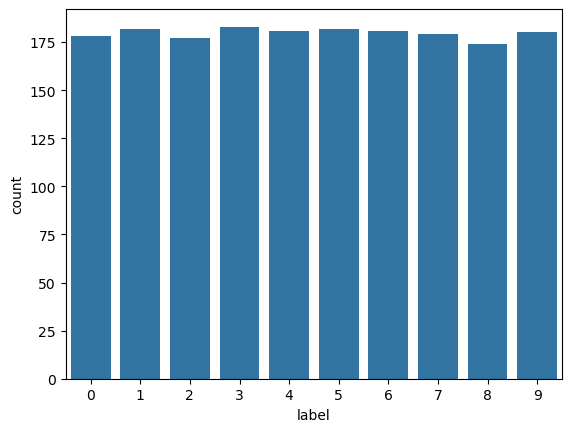

In [10]:
# Distribution Check for Target Variable

sns.countplot(data=image_df, x='label')

In [11]:
image_df.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,label
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


# b. Visualizing the Images


randomly Generated Index: 1111

Label of image at 1111 index:  2
Data type of Image Array:  float64
[[ 0.  1. 15. 16. 10.  0.  0.  0.]
 [ 0.  7. 15. 10. 16.  0.  0.  0.]
 [ 0.  4. 12.  1. 16.  4.  0.  0.]
 [ 0.  0.  2.  3. 16.  1.  0.  0.]
 [ 0.  0.  0.  4. 15.  0.  0.  0.]
 [ 0.  0.  0. 11. 12.  0.  0.  0.]
 [ 0.  0. 11. 16. 14. 14. 15.  3.]
 [ 0.  1. 15. 16. 16. 16. 16.  5.]]


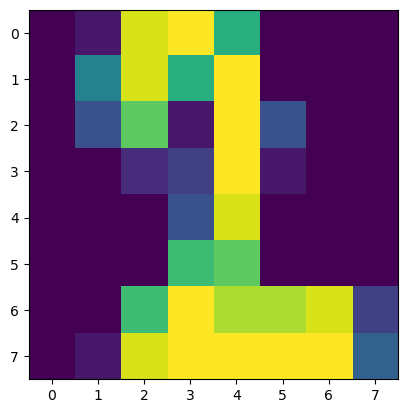

In [23]:
idx = np.random.randint(0, 1796)

# random
print("randomly Generated Index:", idx)

print()
print(f"Label of image at {idx} index: ", image_df.iloc[idx,-1])

img = np.reshape(image_df.iloc[idx, 0:-1 ], (8, 8))

# chọn hàng số index, cột từ đầu đến cuối trừ côt cuối (-1) thường cột cuối là label

print("Data type of Image Array: ", img.dtype)
print(img)
img = img.astype("float")
plt.imshow(img)

# 1 hàng = 1 ảnh  = 1 số

[ 168  205  961 1557  777 1151  267 1131  456]


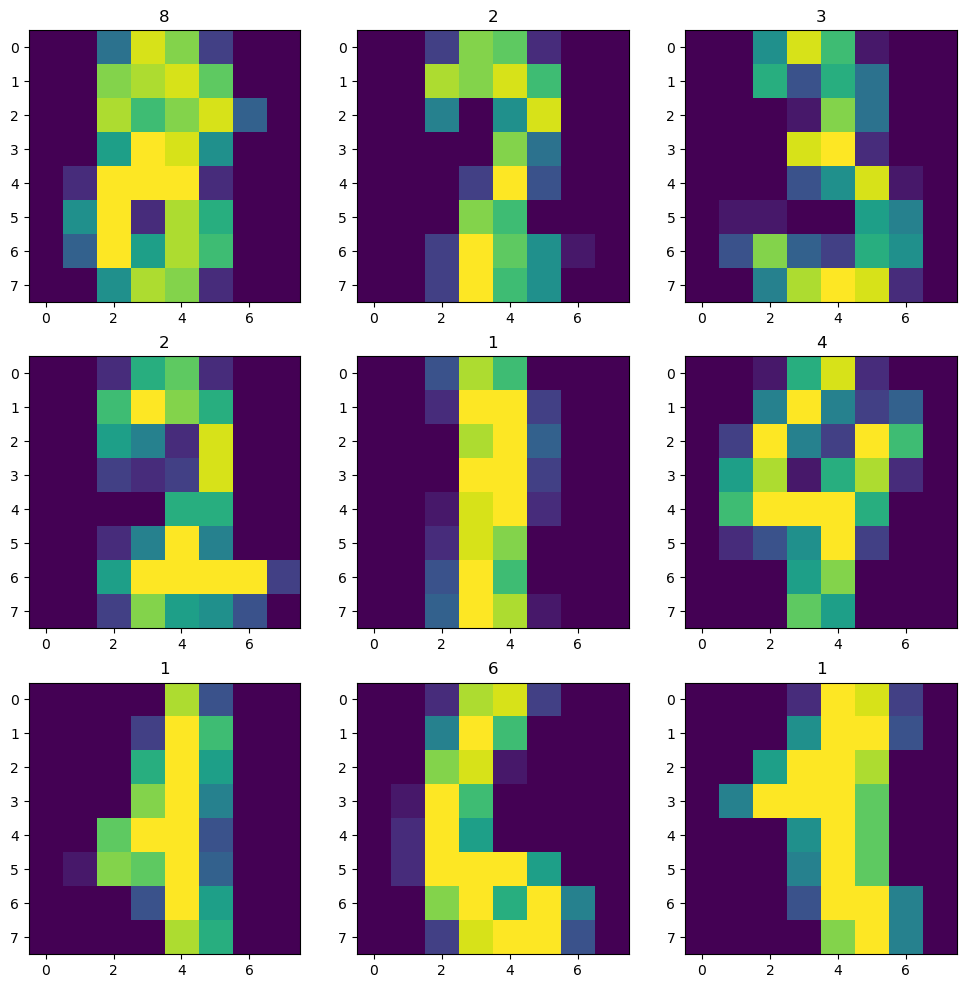

In [29]:
plt.figure(figsize = (12, 12))

idx =np.random.randint(0, image_df.shape[0], 9)
print(idx)

for i in range(len(idx)):
    plt.subplot(3, 3, i + 1)
    label = image_df.iloc[idx[i], -1] # cột cuối hiện label
    plt.title(label)
    img_grid = np.reshape(image_df.iloc[idx[i], 0:-1], (8,8)) # cái hàng đó
    # cuộn theo matrix hàng đó sẽ tạo ra số
    img_grid = img_grid.astype("float")
    plt.imshow(img_grid)
    

# C. Low Dimensional Scatter Plot Visualiztion

In [32]:
image_df.iloc[:, 0:-1].values

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

<Axes: xlabel='Dim_1', ylabel='Dim_2'>

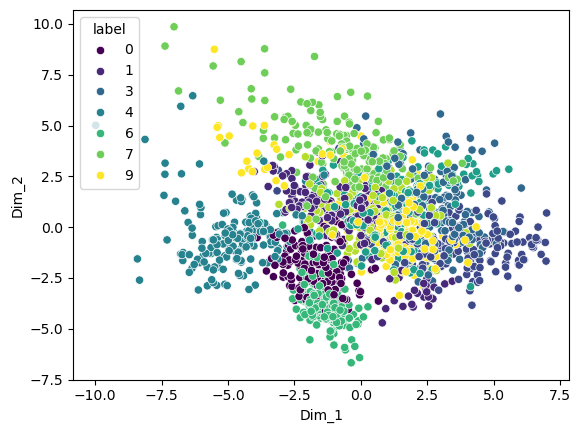

In [41]:
from sklearn.decomposition import PCA # mục tiêu giữ lại các thành phần quan trọng nhất
# để biểu diễn phần lớn thông tin của dữ liệu
# tiền xử lí dữ liệu và trực quan hóa dữ liệu khi có thể giảm xuống 2 hoặc 3 chiều
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
imgs_num_representation = image_df.iloc[:, 0:-1].values

# Standardize the imgs_num_representation = image_d
scaler = StandardScaler()

scaled_embeddings = scaler.fit_transform(imgs_num_representation)

# Creating the object of PCA

pca = PCA(n_components=  2) # giảm xuống còn 2 chiều trực quan hóa cho dễ
pca_data = pca.fit_transform(scaled_embeddings)
# tạo dataframe pca với columns
pca_df = pd.DataFrame(data = pca_data, columns = ("Dim_1", "Dim_2")) 
# tạo label với -1 trong image_df
pca_df["label"] = image_df.iloc[:, -1]

# Asign lables to scatter plot based on the unique values in "labels" column
sns.scatterplot(data=pca_df, x = "Dim_1", y = "Dim_2", hue = "label", palette="viridis")

## Observation
look like there exist clusters in the available data

# Building a Similarity Based Search Engine
( xây dựng công cụ tiemf kiếm ảnh dựa trên độ tương tự (Similariry based Search Engine)

In [47]:
from sklearn.metrics import pairwise
def similarity_finder(search_query, k): 
    # vector đặc trưng của ảnh cần tìm
    # k là số kết quả muonosn lấy
    # Query vector
    search_query_vector = [search_query]
    # Similarity Caculation
    similarity_scores = pairwise.cosine_similarity(search_query_vector, image_df.iloc[:, 0:-1].values).flatten()
    # flatten chuyển thành ma trận 1D
    similar_doc_indices = similarity_scores.argsort()
    # ví dụ trước khi sort thì nó lưu vị trí 
    # sau khi sort nó trả về mảng các vị trí đó
 # print(similarity_scores[similar_doc_indices])
    # print(similar_doc_indices)
    # print(similar_doc_indices[::-1])
    return image_df.loc[similar_doc_indices[::-1]].head(k)

Randomly Generated index: 1415
Label of image at 1415 index: 0

Data Type of Image Array: float64
Image Array:
 [[ 0.  0.  4. 14. 16.  4.  0.  0.]
 [ 0.  0. 12.  8.  9. 12.  0.  0.]
 [ 0.  2. 11.  0.  0. 12.  3.  0.]
 [ 0.  4.  7.  0.  0.  5.  8.  0.]
 [ 0.  6.  4.  0.  0.  4.  8.  0.]
 [ 0.  4.  9.  0.  0.  6.  8.  0.]
 [ 0.  0. 14.  9.  6. 15.  2.  0.]
 [ 0.  0.  4. 16. 15.  5.  0.  0.]]


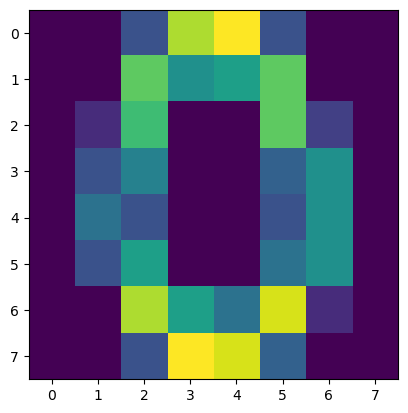

In [44]:
idx = np.random.randint(0, 1796)

print("Randomly Generated index:", idx)

print(f"Label of image at {idx} index:", image_df.iloc[idx, -1])
print()

img = np.reshape(image_df.iloc[idx, 0:-1], (8,8))

print("Data Type of Image Array:", img.dtype)
print("Image Array:\n", img)

img = img.astype("float")

plt.imshow(img)

In [45]:
image_df.iloc[idx, 0:-1].values

array([ 0.,  0.,  4., 14., 16.,  4.,  0.,  0.,  0.,  0., 12.,  8.,  9.,
       12.,  0.,  0.,  0.,  2., 11.,  0.,  0., 12.,  3.,  0.,  0.,  4.,
        7.,  0.,  0.,  5.,  8.,  0.,  0.,  6.,  4.,  0.,  0.,  4.,  8.,
        0.,  0.,  4.,  9.,  0.,  0.,  6.,  8.,  0.,  0.,  0., 14.,  9.,
        6., 15.,  2.,  0.,  0.,  0.,  4., 16., 15.,  5.,  0.,  0.])

In [48]:
similar_imgs = similarity_finder(search_query=image_df.iloc[idx, 0:-1].values, k=9)

similar_imgs

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,label
1415,0.0,0.0,4.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,15.0,5.0,0.0,0.0,0
441,0.0,0.0,4.0,15.0,12.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,6.0,15.0,16.0,8.0,0.0,0.0,0
925,0.0,0.0,6.0,14.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,15.0,16.0,9.0,0.0,0.0,0
957,0.0,0.0,3.0,12.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,15.0,5.0,0.0,0.0,0
1082,0.0,0.0,6.0,16.0,15.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,8.0,16.0,16.0,12.0,1.0,0.0,0
974,0.0,0.0,8.0,14.0,11.0,2.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,5.0,16.0,16.0,7.0,0.0,0.0,0
786,0.0,0.0,6.0,16.0,16.0,8.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,8.0,16.0,15.0,8.0,0.0,0.0,0
1464,0.0,0.0,3.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,12.0,13.0,9.0,0.0,0.0,0
1494,0.0,0.0,2.0,11.0,10.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,13.0,14.0,5.0,0.0,0.0,0


In [49]:
idxs = similar_imgs.index
idxs

Index([1415, 441, 925, 957, 1082, 974, 786, 1464, 1494], dtype='int64')

In [50]:
idxs.shape

(9,)

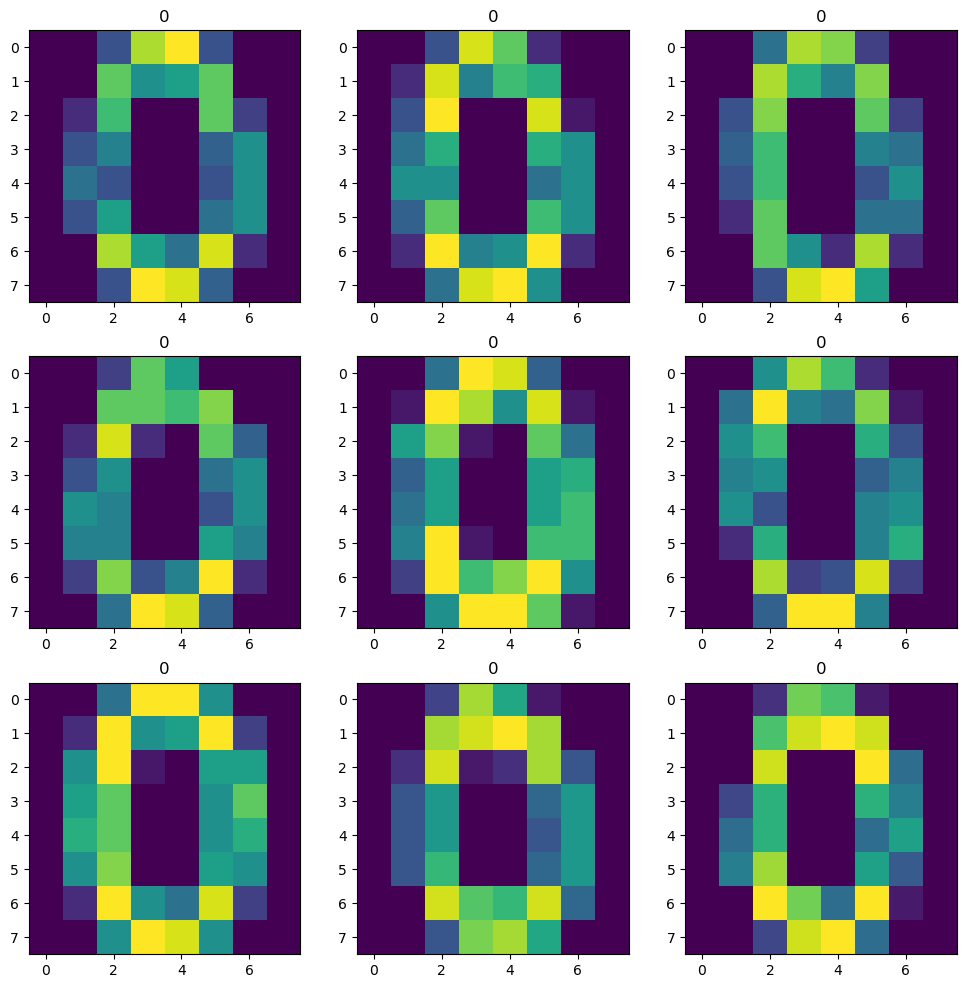

In [51]:
plt.figure(figsize = (12, 12))
for i in range(len(idxs)):
    plt.subplot(3, 3, i + 1)
    plt.title(f"{similar_imgs.iloc[i, -1]}")
    img_grid = np.reshape(similar_imgs.iloc[i, 0:-1], (8, 8))
    plt.imshow(img_grid)